# Data & information Analysis Final Project
## Soheil Vasighmehr
## 9825053

#### First Part - importing Required Libaries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 

#### Second Part
#### - Calling & Describing the Dataset 


In [5]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(10886, 12)

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [11]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [13]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

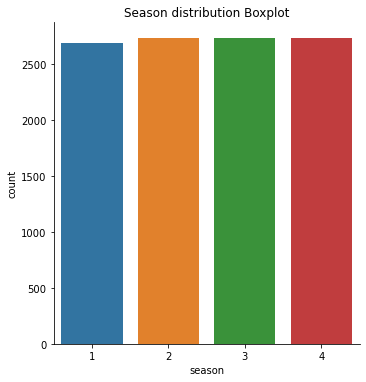

In [54]:
#### 1 = spring, 2 = summer, 3 = fall, 4 = winter
sns.catplot(x="season", kind="count", data=df)
plt.title('Season distribution Boxplot')
plt.show()

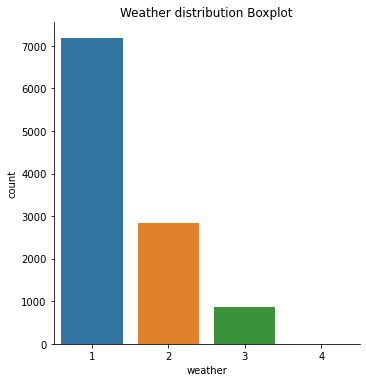

In [53]:
#### 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#### 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#### 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#### 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
sns.catplot(x="weather", kind="count", data=df)
plt.title('Weather distribution Boxplot')
plt.show()

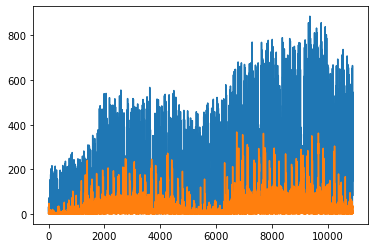

In [4]:
#####Count divided by registered & casual####
r = plt.plot(df['registered'])
c = plt.plot(df['casual'])
plt.show()

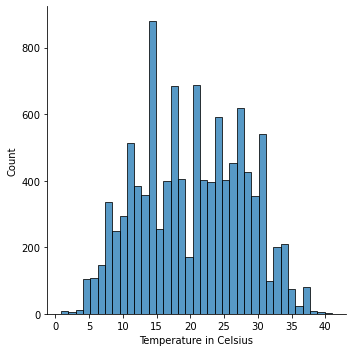

In [51]:
#### temp distribution
a = sns.displot(df, x="temp")
a.set(xlabel='Temperature in Celsius')
plt.show()

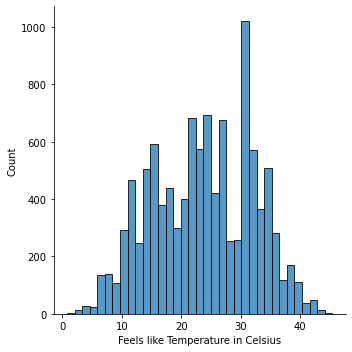

In [50]:
#### a temp distribution
a1 = sns.displot(df, x="atemp")
a1.set(xlabel='Feels like Temperature in Celsius')
plt.show()

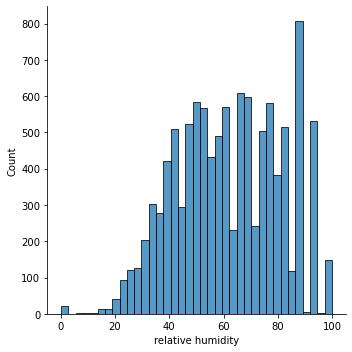

In [49]:
#### humidity distribution
a2 = sns.displot(df, x="humidity")
a2.set(xlabel='relative humidity')
plt.show()

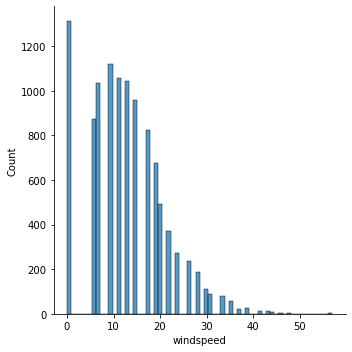

In [48]:
#### windspeed distribution
sns.displot(df, x="windspeed")
plt.show()

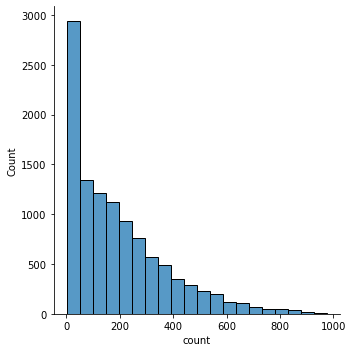

In [46]:
#### number of total rental distribution 
sns.displot(df, x="count",bins=20)
plt.show()

In [72]:
#Numbers Of distribution by holiday
h0 = (df['holiday']==0).sum()
h1 = (df['holiday']==1).sum()
print(h0,h1)

10575 311


In [69]:
#Numbers Of distribution by working day
w0 = (df['workingday']==0).sum()
w1 = (df['workingday']==1).sum()
print(w0,w1)

3474 7412


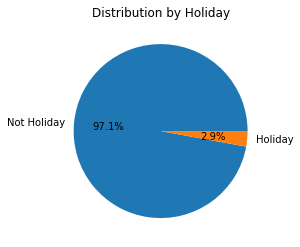

In [74]:
plt.pie(df['holiday'].groupby(df['holiday']).count(),labels=['Not Holiday','Holiday'],autopct='%1.1f%%')
plt.title("Distribution by Holiday")
plt.show()

#### Third Part
#### - Finding Missing Values

In [86]:
df.isna().sum()
#### as we can see, there is no missing value in our train dataset.

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### Forth Part
#### - Correlations

In [6]:
#### to have a more accurate prediction, we added this features from "datetime" column to our dataset. 
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df.datetime.apply(lambda x: x.hour)
df['year'] = df.datetime.apply(lambda x: x.year)
df['month'] = df.datetime.apply(lambda x: x.month)
df['day'] = df.datetime.apply(lambda x: x.day)

In [59]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,day
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613,2011.501929,6.521495,9.992559
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838,0.500019,3.444373,5.476608
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2011.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000,2011.000000,4.000000,5.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000,2012.000000,7.000000,10.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000,2012.000000,10.000000,15.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000,2012.000000,12.000000,19.000000


In [57]:
### correlation table between our features
corr = df.corr()
corr

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,day
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.006546,-0.004797,0.971524,0.001729
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.000354,0.012021,0.001731,-0.015877
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,0.002780,-0.002482,-0.003394,0.009829
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.022740,-0.012548,0.012144,-0.007890
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.145430,0.061226,0.257589,0.015551
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.140343,0.058540,0.264173,0.011866
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.278011,-0.078606,0.204537,-0.011335
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.146631,-0.015221,-0.150192,0.036157
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.302045,0.145241,0.092722,0.014109
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.380540,0.264265,0.169451,0.019111


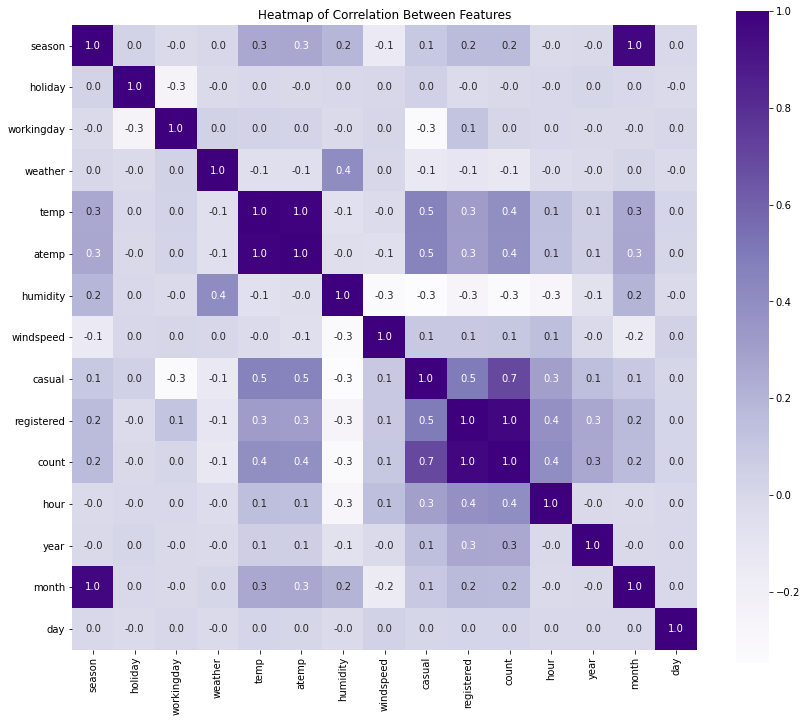

In [16]:
plt.figure(figsize=(14,12))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,square=True,fmt='.1f', cmap="Purples", annot=True)
plt.title('Heatmap of Correlation Between Features')
plt.show()

In [115]:
#### covar table between our features
covar=df.cov()
covar

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,day
season,1.245845,0.005461,-0.004228,0.006281,2.249755,2.504251,4.094458,-1.340722,5.395675,27.649862,33.045536,-0.050528,-0.002677,3.735044,0.010568
holiday,0.005461,0.027755,-0.019454,-0.000747,0.000382,-0.007363,0.006184,0.011438,0.364554,-0.527306,-0.162752,-0.000408,0.001001,0.000994,-0.014487
workingday,-0.004228,-0.019454,0.217304,0.009979,0.108838,0.097421,-0.097606,0.050898,-7.431946,8.410957,0.979011,0.008963,-0.000579,-0.005450,0.025094
weather,0.006281,-0.000747,0.009979,0.401751,-0.271798,-0.297454,4.955459,0.037576,-4.304089,-10.467631,-14.771720,-0.099683,-0.003977,0.026512,-0.027387
temp,2.249755,0.000382,0.108838,-0.271798,60.708872,65.036727,-9.739030,-1.135651,181.827594,374.905577,556.733171,7.836532,0.238534,6.912958,0.663565
atemp,2.504251,-0.007363,0.097421,-0.297454,65.036727,71.818856,-7.100412,-3.976626,195.636701,402.731874,598.368575,8.225332,0.248061,7.711124,0.550740
humidity,4.094458,0.006184,-0.097606,4.955459,-9.739030,-7.100412,370.371306,-50.061695,-334.778582,-771.619982,-1106.398564,-37.002073,-0.756419,13.558160,-1.194690
windspeed,-1.340722,0.011438,0.050898,0.037576,-1.135651,-3.976626,-50.061695,66.659670,37.639843,112.281615,149.921458,8.279479,-0.062140,-4.223652,1.616710
casual,5.395675,0.364554,-7.431946,-4.304089,181.827594,195.636701,-334.778582,37.639843,2496.049219,3752.237210,6248.286429,104.362293,3.628299,15.955844,3.860338
registered,27.649862,-0.527306,8.410957,-10.467631,374.905577,402.731874,-771.619982,112.281615,3752.237210,22812.789514,26565.026724,397.497140,19.957915,88.154368,15.807968


#### Fifth Part
#### - Choosing a fit Model
#### - Train the Model
#### - Prediction with Test dataset

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#### performing SLR with count & casual Columns.
slr = LinearRegression()
count = df[['count']]
atemp = df[['atemp']]
atemp_train, atemp_test, count_train, count_test = train_test_split(atemp, count,test_size=0.3,random_state=4)
slr.fit(atemp_train, count_train)
c_pred = slr.predict(atemp_train)

In [8]:
### using R2 & MSE for Evaluation
from sklearn import metrics
print(metrics.r2_score(count_train,c_pred))
print(metrics.mean_squared_error(count_train,c_pred))

0.14898958396510398
27662.66309721002


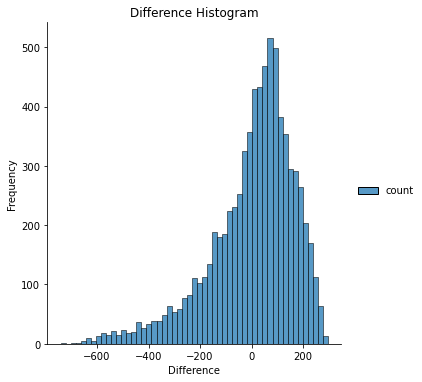

In [118]:
sns.displot(c_pred-count_train)
plt.title("Difference Histogram")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.show()

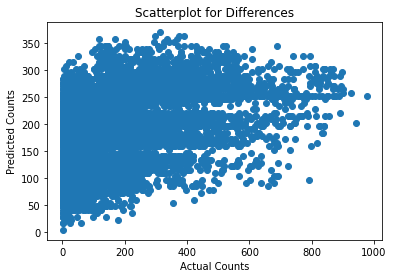

In [119]:
plt.scatter(count_train, c_pred)
plt.title("Scatterplot for Differences")
plt.ylabel("Predicted Counts")
plt.xlabel("Actual Counts")
plt.show()

In [9]:
#### create predict as our feature selection.
predict = df[['humidity','season','temp','windspeed','year','month','hour']]
predict_train, predict_test, count_train, count_test = train_test_split(predict, count,test_size=0.3,random_state=4)
mlr = LinearRegression()
mlr.fit(predict_train, count_train)
p_pred = mlr.predict(predict_train)

In [121]:
print(metrics.r2_score(count_train,p_pred))
print(metrics.mean_squared_error(count_train,p_pred))

0.38578222585037136
19965.559803351094


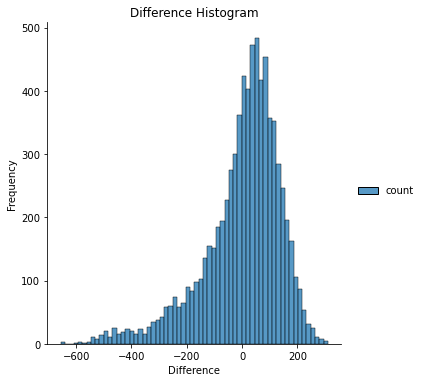

In [122]:
sns.displot(p_pred-count_train)
plt.title("Difference Histogram")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.show()

#### Accumulation around 0 increased.

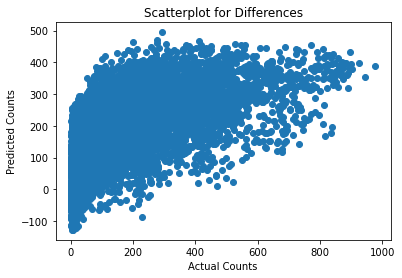

In [123]:
plt.scatter(count_train, p_pred)
plt.title("Scatterplot for Differences")
plt.ylabel("Predicted Counts")
plt.xlabel("Actual Counts")
plt.show()

In [18]:
####Creating a polynomial regression model for the given degree
from sklearn.preprocessing import PolynomialFeatures
polynomial_f = PolynomialFeatures(degree=2)
#### degree 2 for prevent overfitting
quadratic_predict_train = polynomial_f.fit_transform(predict_train)
mlr.fit(quadratic_predict_train,count_train)
count_train_predicted = mlr.predict(quadratic_predict_train)

In [19]:
print(metrics.r2_score(count_train, count_train_predicted))
print(metrics.mean_squared_error(count_train,count_train_predicted))

0.5373002598458343
15040.364707506069


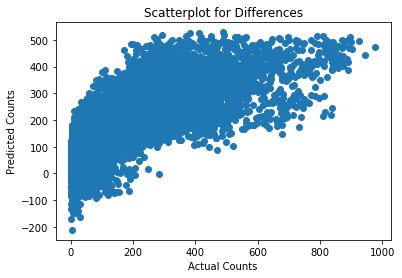

In [20]:
plt.scatter(count_train,count_train_predicted)
plt.title("Scatterplot for Differences")
plt.ylabel("Predicted Counts")
plt.xlabel("Actual Counts")
plt.show()

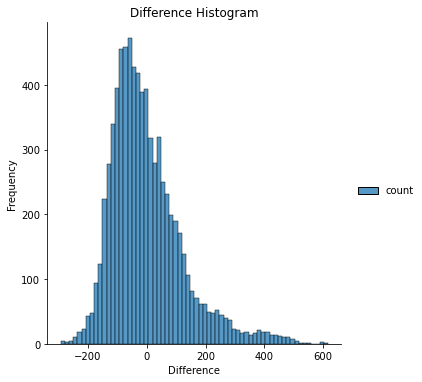

In [21]:
sns.displot(count_train-count_train_predicted)
plt.title("Difference Histogram")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.show()

In [22]:
test = pd.read_csv('test.csv')

In [23]:
###adding hour,month & year to Test dataset. (this time, we didnt add day cause it was useless)
test['datetime'] = pd.to_datetime(test['datetime'])
test['hour'] = test.datetime.apply(lambda x: x.hour)
test['month'] = test.datetime.apply(lambda x: x.month)
test['year'] = test.datetime.apply(lambda x: x.year)

In [24]:
predict_test = test[['humidity','season','temp','windspeed','year','month','hour']]
count_predict = mlr.predict(polynomial_f.fit_transform(predict_test))

### set negative amounts equal to 0 ###
for i in range(0,len(count_predict)):
    count_predict[i]=int(count_predict[i])
    if count_predict[i]<=0:
        count_predict[i]=0
test['count']=count_predict

In [25]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,month,year,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,1,2011,0.0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,1,2011,0.0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,1,2011,8.0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,1,2011,25.0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,1,2011,50.0


In [136]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,month,year,count
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157,11.555367,6.565070,2011.503619,203.024796
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151,6.912526,3.429462,0.500025,130.989549
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000,0.000000,1.000000,2011.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500,6.000000,4.000000,2011.000000,101.000000
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400,12.000000,7.000000,2012.000000,197.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900,18.000000,10.000000,2012.000000,296.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600,23.000000,12.000000,2012.000000,570.000000


In [26]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,month,year,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,1,2011,0.0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,1,2011,0.0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,1,2011,8.0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,1,2011,25.0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,1,2011,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,19,12,2012,413.0
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,20,12,2012,398.0
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,21,12,2012,380.0
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,22,12,2012,367.0


In [27]:
###Test dataset with "count" column.
test.to_csv('Final Predict.csv')

# The End
# Special thanks for Attention and also great tutorials
